# Social Computing - Summer 2017

# Exercise 3 - Determine social capital with linear regression
The following exercise gives you some insights into how research on social networks is acutally conducted.
Based on the data created in the previous weeks you will investigate the correlations between collected features and a person's social capital within the network.


# Linear regression and data analysis

In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression has many practical uses. Most applications fall into one of the following two broad categories:

* If the goal is prediction, or forecasting, or error reduction, linear regression can be used to fit a predictive model to an observed data set of y and X values. After developing such a model, if an additional value of X is then given without its accompanying value of y, the fitted model can be used to make a prediction of the value of y.
* Given a variable y and a number of variables X1, ..., Xp that may be related to y, linear regression analysis can be applied to quantify the strength of the relationship between y and the Xj, to assess which Xj may have no relationship with y at all, and to identify which subsets of the Xj contain redundant information about y.

# Background and data security
In this exercise you will be working with your own data, specifically the data created in the social networking platform. You will try to find correlations between a user's social capital and their interaction behavior in the social network. Therefore you are provided with a list that contains severals excerpts from the social network:

* number of posts per user
* number of comments per user
* number of likes a user received on posts
* number of likes a user received on comments
* number of friends
* number of followers
* number of comments received on posts
* number of characters used in posts
* number of characters used in comments

This data has been slightly altered and disguised to protect your privacy. However, it might still be possible to identify yourself or some others, as all this information is easily available on the network.

The ground truth on the other hand has been heavily altered and disguised. It contains some input from the questionaires, however due to very careful randomization these values allow no relevant conclusions about the true results of the questionaires. It is very likely that some people who received very high rankings are only displayed with low values and vice versa.

We do this to protect your privacy. The overall analysis will work nevertheless.


# Let's get started..
You do not need to worry about all the imports, you just need to compile this segment <b>first</b> for further processing.
<br>
You also need to install:
* panda (pip install panda)
* sklearn (pip install sklearn)
* statsmodels (pip install statsmodels)
* seaborn (pip install seaborn)

Depending on your system setup pip install might not work properly for the installation of the packages. In this case you can try conda install (e.g."conda install seaborn", "conda install scikit-learn"). 

Additional comment: If you have several versions of python installed on your computer, it might be necessary to switch in the console to the same kernel that jupyter uses (e.g., "source activate ipykernel_py2", in Windows without "source"). 

On Windows it might also be useful to type "set PYTHONIOENCODING=UTF-8" in the console before running conda install. 


In [1]:
import xlrd
import pandas as pd
import numpy as np
from sqlalchemy import *

# scikit-learn
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# scipy
import scipy

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.regression.linear_model as sr
from statsmodels.api import add_constant
from numpy.linalg import LinAlgError
import seaborn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats

import math

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
seaborn.set(font_scale=2.2)

print("Imports completed.")

Imports completed.


C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Analysis 1 - The scatter plot
<b>Import the feature table (featuretable.xlsx) in your notebook and print it</b>. This can be done with the panda function read_excel.() This function expects a full path to the file.
Then, <b>plot each feature against the ground truth as scatter plot</b>. The structure of the plotting command is: 
<p>table.plot(kind='scatter', x='FEATURE', y='Ground truth')
<br><p>
When analyzing data it is always a good idea to get an understanding of how the different features correlate with the target variable (ground truth). <b>At first, have a look at the table by importing it with the help of panda. Get familiar with the data by looking at the colomn names. Then, create correlation plots (scatter plots) between all features independently (#posts, #comments, # likes on comments, # friends, # followers, # comments on received posts, # total chars of posts, # total chars of comments) and the ground truth</b>. So 9 plots in total.

Optional: Do you see any correlations?

In [2]:
#TODO Import Feature_Table here
df = pd.read_excel('featuretable.xlsx')
df

,User ID,# Posts,# Comments,# Likes_onPosts,# Likes_onComments,# Friends,# Followers,# Comments received on posts,# Total chars of posts,# Total chars of comments,Ground truth
0,142,0,2,0,1,0,18,0,0,108,47.203067
1,814,0,3,0,0,14,8,0,0,87,36.516531
2,154,3,3,7,0,17,9,3,841,791,40.343814
3,157,0,0,0,0,17,5,0,0,0,32.286131
4,151,2,7,7,1,8,6,0,110,468,35.626833
5,169,1,10,11,20,10,15,10,521,1357,64.718678
6,172,0,0,0,0,3,5,0,0,0,37.051083
7,196,1,5,0,1,0,1,0,59,275,44.125221
8,166,0,1,0,0,4,7,0,0,35,34.307761
9,190,0,8,0,6,4,10,1,0,984,42.262070


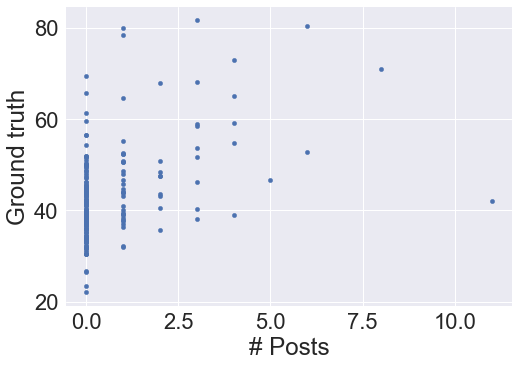

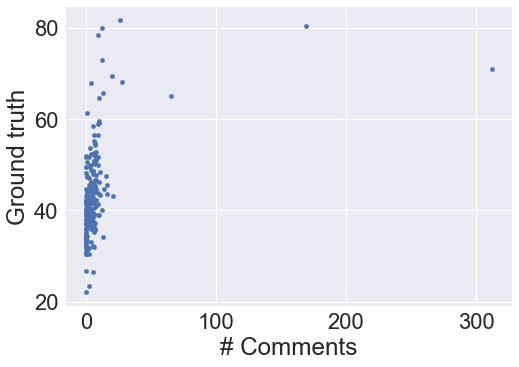

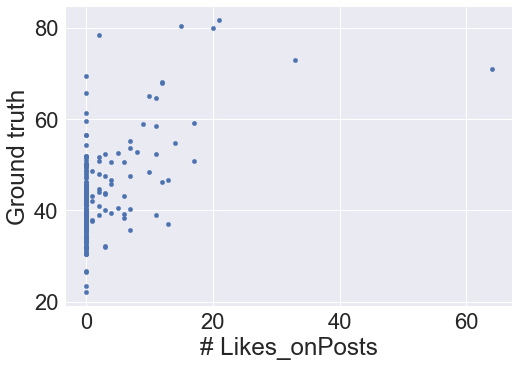

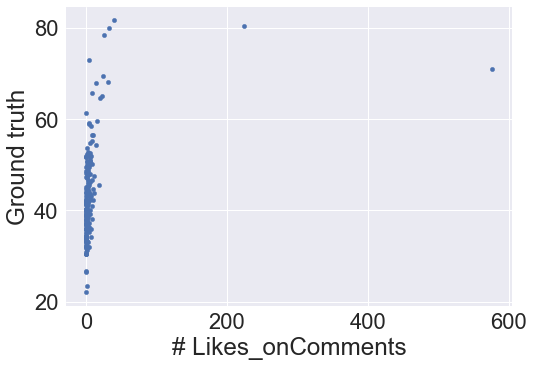

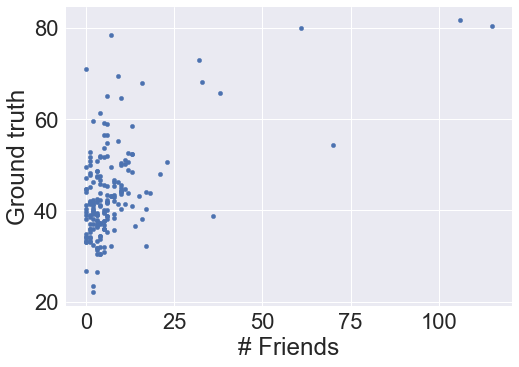

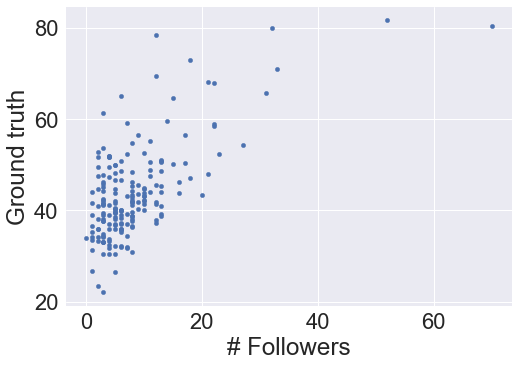

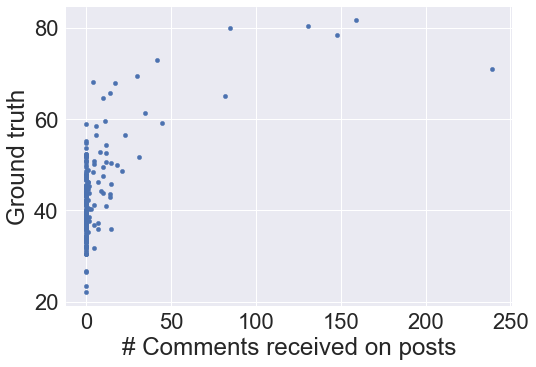

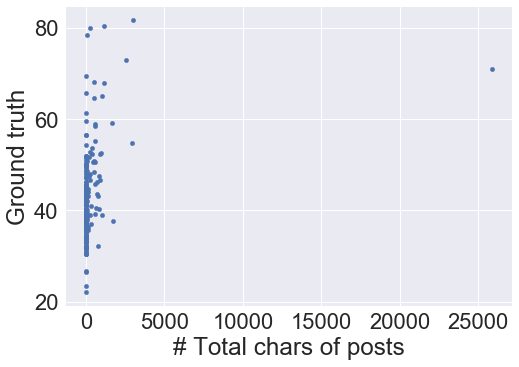

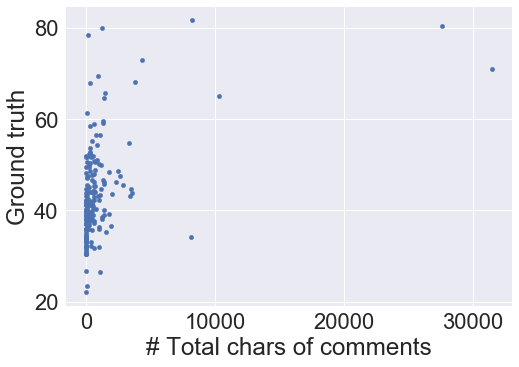

In [3]:
#TODO Insert your plot commands here
df.plot(kind='scatter',x='# Posts',y='Ground truth')
df.plot(kind='scatter',x='# Comments',y='Ground truth')
df.plot(kind='scatter',x='# Likes_onPosts',y='Ground truth')
df.plot(kind='scatter',x='# Likes_onComments',y='Ground truth')
df.plot(kind='scatter',x='# Friends',y='Ground truth')
df.plot(kind='scatter',x='# Followers',y='Ground truth')
df.plot(kind='scatter',x='# Comments received on posts',y='Ground truth')
df.plot(kind='scatter',x='# Total chars of posts',y='Ground truth')
df.plot(kind='scatter',x='# Total chars of comments',y='Ground truth')



## Analysis 2: The Ln Transformation

In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x. In a stronger sense, a transformation is a replacement that changes the shape of a distribution or relationship.

There are many reasons for transformations. The list here is not
comprehensive.

1. Convenience
2. Reducing skewness
3. Equal spreads
4. Linear relationships
5. Additive relationships


If you are looking at just one variable, 1, 2 and 3 are relevant. If you are looking at two or more variables, 4 and 5 are more important. However, transformations that achieve 4 and 5 very often achieve 2 and 3 as well.

<b>Before you calculate the regression apply a ln-transformation to all features. The output should be a new table with all new calculated results!</b>

Hint: As the ln of 0 is not defined. Therefore it is useful to add a small number (e.g., 0.000001) to every value.

In [4]:
# insert code here
updated_df=df[[i for i in list(df.columns) if i != 'User ID']].apply(lambda x: x+0.000001)

updated_df['# Posts']=updated_df['# Posts'].apply(lambda x: math.log(x))
updated_df['# Comments']=updated_df['# Comments'].apply(lambda x: math.log(x))
updated_df['# Likes_onPosts']=updated_df['# Likes_onPosts'].apply(lambda x: math.log(x))
updated_df['# Likes_onComments']=updated_df['# Likes_onComments'].apply(lambda x: math.log(x))
updated_df['# Friends']=updated_df['# Friends'].apply(lambda x: math.log(x))
updated_df['# Followers']=updated_df['# Followers'].apply(lambda x: math.log(x))
updated_df['# Comments received on posts']=updated_df['# Comments received on posts'].apply(lambda x: math.log(x))
updated_df['# Total chars of posts']=updated_df['# Total chars of posts'].apply(lambda x: math.log(x))
updated_df['# Total chars of comments']=updated_df['# Total chars of comments'].apply(lambda x: math.log(x))
updated_df['Ground truth']=updated_df['Ground truth'].apply(lambda x: math.log(x))
updated_df.insert(0,'User ID',df['User ID'])

updated_df

,User ID,# Posts,# Comments,# Likes_onPosts,# Likes_onComments,# Friends,# Followers,# Comments received on posts,# Total chars of posts,# Total chars of comments,Ground truth
0,142,-1.381551e+01,6.931477e-01,-1.381551e+01,9.999995e-07,-1.381551e+01,2.890372e+00,-1.381551e+01,-13.815511,4.682131,3.854459
1,814,-1.381551e+01,1.098613e+00,-1.381551e+01,-1.381551e+01,2.639057e+00,2.079442e+00,-1.381551e+01,-13.815511,4.465908,3.597765
2,154,1.098613e+00,1.098613e+00,1.945910e+00,-1.381551e+01,2.833213e+00,2.197225e+00,1.098613e+00,6.734592,6.673298,3.697438
3,157,-1.381551e+01,-1.381551e+01,-1.381551e+01,-1.381551e+01,2.833213e+00,1.609438e+00,-1.381551e+01,-13.815511,-13.815511,3.474638
4,151,6.931477e-01,1.945910e+00,1.945910e+00,9.999995e-07,2.079442e+00,1.791760e+00,-1.381551e+01,4.700480,6.148468,3.573099
5,169,9.999995e-07,2.302585e+00,2.397895e+00,2.995732e+00,2.302585e+00,2.708050e+00,2.302585e+00,6.255750,7.213032,4.170050
6,172,-1.381551e+01,-1.381551e+01,-1.381551e+01,-1.381551e+01,1.098613e+00,1.609438e+00,-1.381551e+01,-13.815511,-13.815511,3.612298
7,196,9.999995e-07,1.609438e+00,-1.381551e+01,9.999995e-07,-1.381551e+01,9.999995e-07,-1.381551e+01,4.077537,5.616771,3.787032
8,166,-1.381551e+01,9.999995e-07,-1.381551e+01,-1.381551e+01,1.386295e+00,1.945910e+00,-1.381551e+01,-13.815511,3.555348,3.535372
9,190,-1.381551e+01,2.079442e+00,-1.381551e+01,1.791760e+00,1.386295e+00,2.302585e+00,9.999995e-07,-13.815511,6.891626,3.743890


## Analysis 3: Multivariate linear regression (with ln transformation)

A straightforward way to investigate the dependency of the target variable (social capital of a person) on the features is multivariate linear regression. <b>Use all overall features to create a regression with Python. Add a constant term (add_constant(X) will help you with that) to the regression</b>. Before you calculate the regression you need to have applied a ln-transformation to all features. 

For the code you can use the loaded packages from the first codebox (e.g., smf and est1).

<b>List all coefficients of the resulting regression formula. Also, list the adjusted R squared value</b>. 

<b> Briefly state what the coefficients say about the importance of the respective features for predicting the ground truth. What does the r squred value say about the prediction of the linear regression? </b> (Do not write more than 5 sentences)

In [5]:
#insert code here
X = updated_df[['# Posts', '# Comments','# Likes_onPosts','# Likes_onPosts','# Likes_onComments','# Comments received on posts','# Total chars of posts','# Total chars of comments','# Friends','# Followers']]
y = updated_df['Ground truth']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Ground truth   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     16.42
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           1.91e-19
Time:                        02:20:11   Log-Likelihood:                 74.228
No. Observations:                 187   AIC:                            -128.5
Df Residuals:                     177   BIC:                            -96.15
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                            3.9826      0.097     40.928      0.000         3.791     4.175
# Posts                         -0.0063      0.010     -0.605      0.546        -0.027     0.014
# Comments                       0.0376      0.024      1.564      0.120        -0.010     0.085
# Likes_onPosts                  0.0033      0.004      0.789      0.431        -0.005     0.012
# Likes_onPosts                  0.0033      0.004      0.789      0.431        -0.005     0.012
# Likes_onComments               0.0054      0.003      1.995      0.048      5.92e-05     0.011
# Comments received on posts     0.0106      0.002      5.562      0.000         0.007     0.014
# Total chars of posts           0.0049      0.010      0.495      0.621        -0.014     0.024
# Total chars of comments       -0.0292      0.019     -1.556      0.122        -0.066     0.008
# Friends                        0.0022      0.003      0.765      0.445        -0.003     0.008
# Followers                      0.0281      0.010      2.918      0.004         0.009     0.047
==============================================================================
Omnibus:                        2.589   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.206
Skew:                          -0.249   Prob(JB):                        0.332
Kurtosis:                       3.187   Cond. No.                     1.21e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The p-value for each term tests the null hypothesis that the coefficient is equal to zero, meaning there is no effect. A low p-value,lets say less than 0.05, indicates that you can reject the null hypothesis.
A predictor that has a low p-value is likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable.
Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant.In the above table, it shows that coef value for #posts is -0.0063, this says that for every increase in number of posts the ground truth value decreases by -0.0063.
Rsquared : R squared measures how close the data are to the fitted regression line.The Higher the R squared value, better the model fits our data.0% indicates that the model explains none of the variability and 100% indicates model explains all of the variability.

## Optional: Analysis 4: Evaluate the goodness of the fit
There are several methods to evaluate the goodness of a regression. In this exercise, you will work with two of them. 

<b>At first create a QQ-plot. What does the result mean for your fit?</b> (write 2-3 sentences). 

<b>Now, evaluate your fit by plotting the residuals.  What does the result mean for your fit? </b> (write 2-3 sentences)

Further information about the QQ-plot can be found here: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

More information on regression diagnostics can be found here: https://degninou.net/2016/02/04/multiple-regression-and-diagnostics-with-python/

<b>Hint:</b> statsmodel packages provides a plot function for the QQ-plot


In [ ]:
# TODO Optional: Create QQ Plot


In [ ]:
# TODO Optional: Plot Standardized Residuals


### Optional: What does the result mean for your fit?  <br><p>




### Optional: Evaluate your fit by plotting the residuals. What does the result mean for your fit? <br><p>

